In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LassoCV, LogisticRegression, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_regression
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, make_scorer, f1_score, fbeta_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE  
from imblearn.under_sampling import TomekLinks, ClusterCentroids
from sklearn import manifold
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.ensemble import StackingClassifier, VotingClassifier, StackingRegressor
from sklearn.pipeline import Pipeline, make_pipeline


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
GDSC = pd.read_csv(r"C:\Users\j3192\Desktop\台大\資料科學\謝\Final Project\GDSC_PDX_Gemcitabine.csv", nrows = 866)
patient = pd.read_csv(r"C:\Users\j3192\Desktop\台大\資料科學\謝\Final Project\Patients_PDX_Gemcitabine.csv")

In [4]:
GDSC.rename(columns={"Unnamed: 0":"CELL_LINE_NAME"}, inplace = True)
GDSC = GDSC.set_index("CELL_LINE_NAME")
GDSC

,IC50,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,MRPL46,HPR,MIA,LINC00514,OR1D5,ZNF234,MYH4,LINC00526,KRT18P55,TBC1D3P5
CELL_LINE_NAME,,,,,,,,,,,,,,,,,,,,,
MC-CAR,0.012131,-1.814485,0.491873,0.363579,1.141991,0.887238,5.372497,-0.450005,-0.634588,-0.839292,...,0.747508,0.068854,0.066791,-0.508168,0.305573,-0.776009,0.220463,0.928327,-0.116495,0.992188
PFSK-1,0.670550,0.567305,-0.404055,-0.143477,0.195337,0.048088,-0.288101,2.224286,-2.005969,-1.107810,...,1.240756,0.097911,-0.503383,-0.426591,0.464634,0.569442,-0.041487,-1.432101,-0.797533,-0.441443
A673,0.024509,0.315952,0.133030,-0.212805,-0.228297,-0.039395,-0.408825,-0.491147,-1.423734,-0.924361,...,0.106418,-0.002822,-0.464920,-0.285757,0.415622,-0.272890,-0.418522,0.167499,-0.931559,-1.356899
ES3,0.049843,1.044185,0.919173,-0.083906,0.609858,-0.840243,-0.193485,-0.742519,-2.188093,-0.460394,...,0.527642,-0.055882,-0.556405,-0.339686,-1.978045,1.078563,-0.438534,0.207639,-0.728131,-1.488213
ES5,0.089286,0.804511,-0.124581,-0.040822,0.942633,0.332401,-0.364475,0.529475,-2.331598,-0.374375,...,1.052024,-0.202266,-0.374054,-0.533192,-1.125581,0.986092,-0.435412,1.299025,0.073606,-0.445415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MDA-MB-330,12.773427,0.223475,-0.718695,-0.825610,1.145224,-0.631520,-0.505222,-0.615390,0.707369,-0.395251,...,-0.557724,-0.489015,-0.373190,0.522164,0.022792,-0.648475,-0.163229,-1.449542,0.179239,-1.870277
ME-1,1.442306,-1.695811,-0.122505,-0.089255,0.733601,-0.237118,-0.167377,-0.659774,-0.058626,0.372255,...,-0.434262,0.644089,0.192892,-0.517193,-0.306161,1.160777,-0.264631,-0.968869,0.818156,1.192138
ROS-50,2.042250,-1.681944,0.028000,0.724778,-0.430309,0.231555,1.664327,-0.685844,-1.839074,-0.285503,...,0.087300,0.090754,-0.313987,-0.201036,1.546762,-0.208025,-0.050225,-0.462431,0.499535,1.173256


Sensitive: 680, Resistant: 186


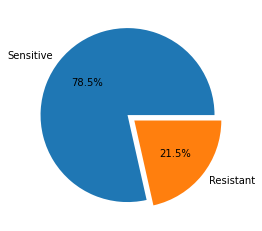

In [7]:
#Mark the sensitive of drug to the cell line
GDSC["SENSITIVE"] = GDSC["IC50"] < 1.024
S = len(np.where(GDSC["SENSITIVE"])[0])
R = len(GDSC["SENSITIVE"]) - S
print(f"Sensitive: {S}, Resistant: {R}")
separeted = (0, 0.1)  
plt.pie((S, R), labels = ["Sensitive", "Resistant"], explode = separeted, autopct = "%1.1f%%")
plt.show()

In [8]:
patient.rename(columns={"Unnamed: 0":"Patient"}, inplace = True)
patient = patient.set_index("Patient")
patient

,label,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,MRPL46,HPR,MIA,LINC00514,OR1D5,ZNF234,MYH4,LINC00526,KRT18P55,TBC1D3P5
Patient,,,,,,,,,,,,,,,,,,,,,
X.1199,0,0.517448,-0.088293,0.229923,0.114800,0.337544,-0.470616,-1.236963,2.014977,0.877973,...,-1.574764,-0.119777,0.766986,0.236129,-0.168769,1.986294,-0.092715,1.743036,0.189594,-0.015005
X.1289,1,0.733162,0.078329,0.563444,0.081961,-0.204118,-0.673566,1.055858,0.781030,-0.186652,...,0.832951,-0.119777,0.660462,-0.788517,-0.168769,0.672176,-0.092715,0.108100,0.190891,-0.015005
X.1317,0,0.122934,-0.088293,0.747687,-0.021034,0.748263,0.792556,1.138202,0.532994,-0.385374,...,0.662147,-0.119777,1.258735,-0.220485,4.588175,0.935168,0.251657,-0.873302,0.084979,-0.015005
X.1362,0,1.037688,-0.026854,0.823733,-0.099040,-0.256089,0.218556,1.438371,-0.823007,1.251963,...,0.187778,0.275198,-1.423498,-1.114126,-0.168769,0.412553,-0.092715,-0.568163,0.047517,-0.015005
X.2026,1,0.515660,-0.088293,0.393082,1.459738,1.884537,2.908949,0.447699,0.515667,-1.127211,...,-1.093374,-0.119777,1.085927,0.459379,-0.168769,1.026301,-0.092715,-0.808603,-0.337581,-0.015005
X.2043,0,-0.929292,-0.021263,-2.945034,-1.309312,-0.470812,-0.782696,0.553889,0.478664,-1.985746,...,0.799149,-0.119777,0.368424,-0.528788,-0.168769,-1.938883,-0.092715,0.216644,-0.337581,-0.015005
X.2081,0,-0.257203,-0.088293,-0.028200,-0.531702,-0.670843,-0.782696,-1.186661,-0.346499,0.847036,...,1.768075,0.355415,0.644359,2.416661,-0.168769,-0.972503,-0.092715,0.304374,-0.337581,-0.015005
X.2283,0,-0.032107,-0.088293,-1.198147,-0.801589,-0.229478,-0.782696,-1.167250,0.802429,0.519867,...,-0.483103,-0.119777,0.614455,-0.716816,-0.168769,0.300970,-0.092715,0.124543,-0.337581,-0.015005
X.2339,0,-1.135817,-0.088293,-0.167857,-1.487064,-1.274192,-0.733652,-1.287431,0.964167,1.955796,...,-0.369037,-0.119777,0.247508,1.247798,-0.168769,-0.586827,-0.092715,-0.208888,-0.337581,-0.015005


In [9]:
train_data = GDSC[set(GDSC.columns) & set(patient.columns)]
train_data

,DLGAP3,KRTAP20.3,DNM1L,PLOD1,ADM2,KATNB1,KAAG1,COL6A3,ZNF425,ARG1,...,CNGB3,ITPKC,FBF1,RNF208,RNF145,NEK10,SERPINH1,KCTD14,MAML3,SLC18B1
CELL_LINE_NAME,,,,,,,,,,,,,,,,,,,,,
MC-CAR,0.504307,0.315466,-0.038879,-1.673147,-0.694239,-0.439141,-0.347789,-0.415403,-0.566260,0.150008,...,0.770960,-0.327376,0.517086,0.328586,-0.984421,0.712961,-1.508148,-0.689281,-0.554484,-0.441723
PFSK-1,-0.370115,-0.405203,-0.206372,0.507036,0.954179,-0.175300,-0.106361,0.000615,0.134090,-0.492044,...,-1.285153,0.310187,-1.108063,-0.206530,0.382153,-0.300601,0.916514,-0.707091,-0.752542,-0.877480
A673,-0.946471,-1.483694,0.968300,0.648196,0.852073,2.087826,0.029412,-0.337495,-0.448679,-0.036744,...,0.029058,-1.112047,-1.002260,0.645090,1.507309,-0.643055,0.950629,-0.807542,-0.626109,2.627137
ES3,-1.697310,0.325990,1.836315,-0.767711,2.042184,1.008510,-0.094366,-0.318302,3.786418,-0.804416,...,-0.961542,-0.333829,-1.171303,1.938672,0.337184,-0.630069,0.533711,-0.706502,1.190453,0.272441
ES5,0.088803,-0.534535,0.318100,0.267428,-0.194083,0.077959,-0.212379,-0.393607,1.776403,-0.062500,...,-0.554893,-0.300587,-0.359156,1.112089,0.678997,-0.115243,0.166028,-0.773134,0.183730,2.124154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MDA-MB-330,-0.659192,-0.660038,-0.656947,-0.983909,0.069613,-0.692480,-0.622520,-0.474595,-0.347942,-0.271465,...,-0.071188,0.855694,1.431202,-0.802339,-3.001983,-0.868789,-0.656427,-0.637538,0.362524,-0.694109
ME-1,6.780552,1.316767,0.191949,-0.802673,0.694665,1.375355,0.226544,-0.396925,-0.109140,-0.071544,...,0.699263,-0.912482,0.065381,-0.468204,-0.715653,1.798071,-1.990949,-0.710598,4.727579,-1.407741
ROS-50,1.177935,-0.679962,-0.065264,-1.060634,-0.349728,1.490015,-0.152693,-0.449120,-0.442555,-0.391995,...,0.201698,-0.882189,0.649102,-0.087367,-0.808416,0.578193,-1.966811,-0.721782,-0.427348,-0.186667


In [10]:
test_data = patient[set(GDSC.columns) & set(patient.columns)]
test_data

,DLGAP3,KRTAP20.3,DNM1L,PLOD1,ADM2,KATNB1,KAAG1,COL6A3,ZNF425,ARG1,...,CNGB3,ITPKC,FBF1,RNF208,RNF145,NEK10,SERPINH1,KCTD14,MAML3,SLC18B1
Patient,,,,,,,,,,,,,,,,,,,,,
X.1199,1.427365,-0.122086,0.015051,-0.534742,0.839556,-0.338685,-0.284166,0.075828,-1.181035,-0.147089,...,-0.385080,0.449614,0.425368,-0.863621,0.378856,-0.570721,-0.248638,1.540865,1.486855,1.170331
X.1289,0.423929,5.536222,0.204400,-1.976037,-1.006087,0.379764,-0.284166,-0.149604,1.608173,-0.147089,...,-0.218479,0.443653,0.705377,-2.517034,2.139308,-0.453598,-0.758645,1.755312,1.663946,0.167688
X.1317,-0.283106,-0.122086,1.051549,0.533593,0.250155,0.153577,1.607204,-0.029461,1.229870,0.239376,...,-0.251868,-0.717485,0.917124,0.385337,0.114744,0.064805,1.403726,-0.558470,0.987623,1.096146
X.1362,-0.299137,-0.122086,0.938823,0.249562,-0.719670,0.407261,-0.144377,-0.101194,1.013094,0.377118,...,3.792757,-0.065190,0.953770,0.135762,0.389242,-0.344561,0.261500,-0.558470,0.043679,-0.691062
X.2026,-0.473101,-0.122086,1.067808,-0.140540,1.160881,2.272682,-0.284166,-0.072888,0.996251,-0.147089,...,-0.385080,0.576321,-0.005485,0.016593,0.661251,-0.636605,0.587104,-0.558470,0.041353,1.042914
X.2043,-0.389134,-0.122086,-3.004978,-1.254678,0.874393,0.225245,4.585054,-0.327644,0.117283,-0.147089,...,-0.252630,-0.610648,-1.103514,1.143137,-0.492519,-0.936422,0.177061,-0.558470,-1.552195,-1.696812
X.2081,-0.350911,-0.122086,-1.450535,-0.543046,-0.480257,-2.267210,-0.284166,-0.349102,-0.513272,-0.147089,...,-0.385080,0.988803,0.912927,0.661781,0.409598,-0.351467,-0.640579,-0.558470,-0.126124,0.363208
X.2283,-0.439974,-0.122086,1.130694,0.703320,-0.067696,-0.300519,-0.284166,2.885449,-0.174255,-0.147089,...,-0.385080,-0.773135,-1.103514,-0.211479,-0.154745,-0.290124,0.331149,1.567492,0.278734,0.543893
X.2339,-0.379501,-0.122086,-0.865942,0.130703,-1.618374,-0.573317,-0.284166,0.373011,-0.643717,0.069611,...,-0.385080,0.220436,-1.103514,0.412634,-0.066600,-0.726776,0.920796,-0.558470,-0.540295,0.353401


In [11]:
X_train = StandardScaler().fit_transform(train_data)
X_test = StandardScaler().fit_transform(test_data)
y_train = GDSC.SENSITIVE
y_test = patient.label

## 1. Baseline

### Logistic Regression without feature selection

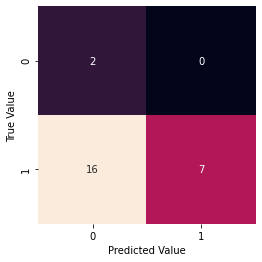

In [231]:
model = LogisticRegression(solver='liblinear', multi_class="ovr", penalty='l1')
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
sns.heatmap(confusion_matrix(y_hat, y_test),square= True, annot=True, cbar= False)
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.show()

### Logistic Regression with LASSO

In [234]:
lasso = SelectFromModel(LassoCV())
lasso.fit(X_train, y_train)
X_train_lasso = lasso.transform(X_train)
X_test_lasso = lasso.transform(X_test)
X_train_lasso.shape

(866, 7)

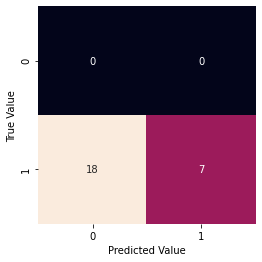

In [235]:
model = LogisticRegression(solver='liblinear', multi_class="ovr", penalty='l1')
model.fit(X_train_lasso, y_train)
y_hat = model.predict(X_test_lasso)
sns.heatmap(confusion_matrix(y_hat, y_test),square= True, annot=True, cbar= False)
print(f"f1_score: {round(f1_score(y_hat, y_test), 3)}")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.show()

## 2. Comparison of over-sampling with SMOTE and under-sampling with ClusterCentroids

### 2.1 SMOTE and do a feature selection by Lasso

In [660]:
smote=SMOTE ()
X_res, y_res = smote.fit_resample(X_train,y_train)
X_res.shape

(1360, 16190)

fbeta_score: 0.25


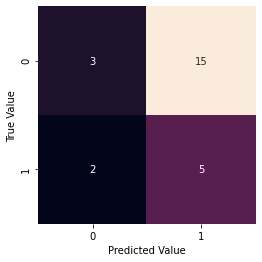

In [661]:
lasso = SelectFromModel(Lasso())
logistic = LogisticRegression(solver='liblinear', multi_class="ovr", penalty='l1')
pipe = Pipeline(steps=[('lasso', lasso), ('logistic', logistic)])
param_grid  = [{'lasso__estimator__alpha': np.linspace(0, 0.1, 11), 
              'logistic__C':np.logspace(-1, 2, 4)}]
cv = StratifiedKFold(n_splits=5, shuffle=True)
A = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=cv, scoring=make_scorer(fbeta_score, beta = 0),return_train_score = True)
A.fit(X_res, y_res)
y_hat = A.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_hat),square= True, annot=True, cbar= False)
print(f"fbeta_score: {round(fbeta_score(y_test, y_hat, beta = 0), 3)}")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.show()

### 2.2 ClusterCentroids and do a feature selection by Lasso

In [51]:
cc=ClusterCentroids()
X_res, y_res = cc.fit_resample(X_train,y_train)
X_res.shape

(372, 16190)

fbeta_score: 0.462


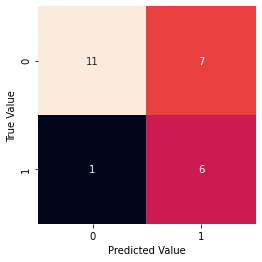

In [665]:
lasso = SelectFromModel(Lasso())
logistic = LogisticRegression(solver='liblinear', multi_class="ovr", penalty='l1')
pipe = Pipeline(steps=[('lasso', lasso), ('logistic', logistic)])
param_grid  = [{'lasso__estimator__alpha': np.linspace(0, 0.1, 11), 
              'logistic__C':np.logspace(-1, 2, 4)}]
cv = StratifiedKFold(n_splits=5, shuffle=True)
A = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=cv, scoring=make_scorer(fbeta_score, beta = 0),return_train_score = True)
A.fit(X_res, y_res)
y_hat = A.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_hat),square= True, annot=True, cbar= False)
print(f"fbeta_score: {round(fbeta_score(y_test, y_hat, beta = 0), 3)}")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.show()

### Logistic Regression with Lasso

In [629]:
GSCV1_list = []
for i in range(100):
    print(i)
    lasso = SelectFromModel(Lasso())
    logistic = LogisticRegression(solver='liblinear', multi_class="ovr", penalty='l1')
    pipe = Pipeline(steps=[('lasso', lasso), ('logistic', logistic)])
    param_grid  = [{'lasso__estimator__alpha': np.linspace(0, 0.1, 11), 
                  'logistic__C':np.logspace(-1, 2, 4)}]
    cv = StratifiedKFold(n_splits=5, shuffle=True)
    GSCV1 = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=cv, scoring=make_scorer(fbeta_score, beta = 0),return_train_score = True)
    GSCV1.fit(X_res, y_res)
    GSCV1_list.append(GSCV1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [732]:
GSCV1_1 = pd.DataFrame(np.array(GSCV1_list[0].cv_results_['mean_test_score']).reshape(11, 4))
for i in range(1, len(GSCV1_list)):
    GSCV1_1 += pd.DataFrame((np.array(GSCV1_list[i].cv_results_['mean_test_score'])).reshape(11, 4))
GSCV1_1.columns = [f"C = {i}"for i in np.logspace(-1, 2, 4)]
GSCV1_1.index = [f"alpha = {i}"for i in np.linspace(0, 0.1, 11)]
round(GSCV1_1, 3)

,C = 0.1,C = 1.0,C = 10.0,C = 100.0
alpha = 0.0,62.355,59.226,58.174,54.319
alpha = 0.01,62.253,58.696,57.647,57.338
alpha = 0.02,62.100,58.836,58.187,58.120
alpha = 0.03,62.182,59.108,58.456,58.186
alpha = 0.04,62.142,59.089,58.292,58.065
alpha = 0.05,61.834,58.473,57.679,57.554
alpha = 0.06,61.842,58.834,58.031,57.899
alpha = 0.07,61.937,59.662,58.971,58.937
alpha = 0.08,62.181,60.607,59.940,59.896
alpha = 0.09,62.358,61.570,61.180,61.120


(372, 12)
fbeta_score: 0.462


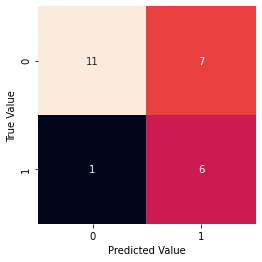

In [737]:
lasso = SelectFromModel(Lasso(alpha = 0.1))
lasso.fit(X_res, y_res)
X_train_lasso = lasso.transform(X_res)
print(X_train_lasso.shape)
X_test_lasso = lasso.transform(X_test)
model = LogisticRegression(solver='liblinear', multi_class="ovr", penalty='l1', C = 0.1)
model.fit(X_train_lasso, y_res)
y_hat = model.predict(X_test_lasso)
sns.heatmap(confusion_matrix(y_test, y_hat),square= True, annot=True, cbar= False)
print(f"fbeta_score: {round(fbeta_score(y_test, y_hat, beta = 0), 3)}")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.show()

accuracy：0.77, f_beta-scores：0.462


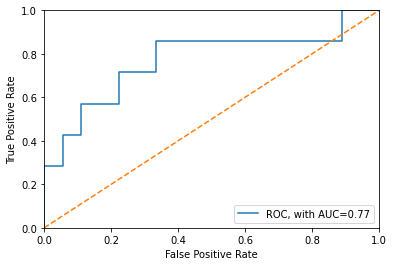

In [738]:
y_hat_prob = model.predict_proba(X_test_lasso)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_hat_prob)
auc = roc_auc_score(y_test, y_hat_prob)
print(f"accuracy：{np.around(auc, 3)}, f_beta-scores：{round(fbeta_score(y_test, y_hat, beta = 0), 3)}")
plt.plot(fpr,tpr,label=f"ROC, with AUC={round(auc, 3)}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [52]:
GSCV1_list = []
for i in range(100):
    print(i)
    lasso = SelectFromModel(Lasso())
    logistic = LogisticRegression(solver='liblinear', multi_class="ovr", penalty='l1')
    pipe = Pipeline(steps=[('lasso', lasso), ('logistic', logistic)])
    param_grid  = [{'lasso__estimator__alpha': np.linspace(0, 0.1, 11), 
                  'logistic__C':np.logspace(-1, 2, 4)}]
    cv = StratifiedKFold(n_splits=5, shuffle=True)
    GSCV1 = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=cv, scoring=make_scorer(fbeta_score, beta = 0),return_train_score = True, n_jobs = -1, verbose=1)
    GSCV1.fit(X_res, y_res)
    GSCV1_list.append(GSCV1)

0
Fitting 5 folds for each of 44 candidates, totalling 220 fits
1
Fitting 5 folds for each of 44 candidates, totalling 220 fits
2
Fitting 5 folds for each of 44 candidates, totalling 220 fits
3
Fitting 5 folds for each of 44 candidates, totalling 220 fits
4
Fitting 5 folds for each of 44 candidates, totalling 220 fits
5
Fitting 5 folds for each of 44 candidates, totalling 220 fits
6
Fitting 5 folds for each of 44 candidates, totalling 220 fits
7
Fitting 5 folds for each of 44 candidates, totalling 220 fits
8
Fitting 5 folds for each of 44 candidates, totalling 220 fits
9
Fitting 5 folds for each of 44 candidates, totalling 220 fits
10
Fitting 5 folds for each of 44 candidates, totalling 220 fits
11
Fitting 5 folds for each of 44 candidates, totalling 220 fits
12
Fitting 5 folds for each of 44 candidates, totalling 220 fits
13
Fitting 5 folds for each of 44 candidates, totalling 220 fits
14
Fitting 5 folds for each of 44 candidates, totalling 220 fits
15
Fitting 5 folds for each of 44 c

In [53]:
GSCV1_1 = pd.DataFrame(np.array(GSCV1_list[0].cv_results_['mean_test_score']).reshape(11, 4))
for i in range(1, len(GSCV1_list)):
    GSCV1_1 += pd.DataFrame((np.array(GSCV1_list[i].cv_results_['mean_test_score'])).reshape(11, 4))
GSCV1_1.columns = [f"C = {i}"for i in np.logspace(-1, 2, 4)]
GSCV1_1.index = [f"alpha = {i}"for i in np.linspace(0, 0.1, 11)]
round(GSCV1_1, 3)

,C = 0.1,C = 1.0,C = 10.0,C = 100.0
alpha = 0.0,62.490,56.967,56.103,52.715
alpha = 0.01,61.065,56.823,55.856,55.722
alpha = 0.02,61.936,56.738,56.106,55.961
alpha = 0.03,62.218,57.442,56.866,56.555
alpha = 0.04,62.334,57.868,57.412,57.240
alpha = 0.05,62.422,58.425,57.182,57.061
alpha = 0.06,62.697,59.212,58.182,57.969
alpha = 0.07,62.642,60.246,59.395,59.304
alpha = 0.08,61.765,60.103,59.384,59.290
alpha = 0.09,60.837,59.570,59.010,58.912


In [118]:
cc=ClusterCentroids()
X_res, y_res = cc.fit_resample(X_train,y_train)
X_res.shape

(372, 16190)

(372, 281)
fbeta_score: 0.417


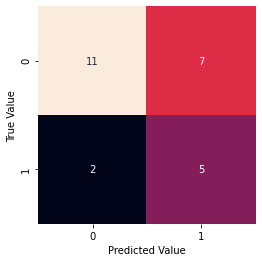

In [164]:
lasso = SelectFromModel(Lasso(alpha = 0.01))
lasso.fit(X_res, y_res)
X_train_lasso = lasso.transform(X_res)
print(X_train_lasso.shape)
X_test_lasso = lasso.transform(X_test)
model = LogisticRegression(solver='liblinear', multi_class="ovr", penalty='l1', C = 0.1)
model.fit(X_train_lasso, y_res)
y_hat = model.predict(X_test_lasso)
sns.heatmap(confusion_matrix(y_test, y_hat),square= True, annot=True, cbar= False)
print(f"fbeta_score: {round(fbeta_score(y_test, y_hat, beta = 0), 3)}")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.show()

accuracy：0.786, f_beta-scores：0.385


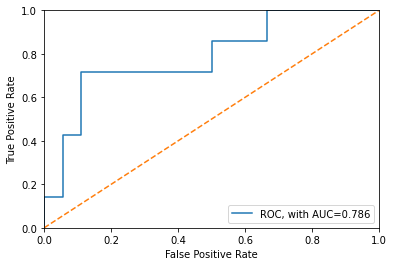

In [120]:
y_hat_prob = model.predict_proba(X_test_lasso)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_hat_prob)
auc = roc_auc_score(y_test, y_hat_prob)
print(f"accuracy：{np.around(auc, 3)}, f_beta-scores：{round(fbeta_score(y_test, y_hat, beta = 0), 3)}")
plt.plot(fpr,tpr,label=f"ROC, with AUC={round(auc, 3)}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

(372, 20)
fbeta_score: 0.455


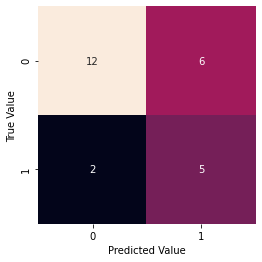

In [183]:
anova = SelectKBest(f_regression, k = 20)
anova.fit(X_res, y_res)
X_train_anova = anova.transform(X_res)
print(X_train_anova.shape)
X_test_anova = anova.transform(X_test)
model = LogisticRegression(solver='liblinear', multi_class="ovr", penalty='l1', C = 1)
model.fit(X_train_anova, y_res)
y_hat = model.predict(X_test_anova)
sns.heatmap(confusion_matrix(y_test, y_hat),square= True, annot=True, cbar= False)
print(f"fbeta_score: {round(fbeta_score(y_test, y_hat, beta = 0), 3)}")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.show()

accuracy：0.571, f_beta-scores：0.455


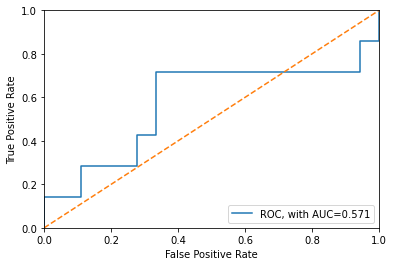

In [184]:
y_hat_prob = model.predict_proba(X_test_anova)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_hat_prob)
auc = roc_auc_score(y_test, y_hat_prob)
print(f"accuracy：{np.around(auc, 3)}, f_beta-scores：{round(fbeta_score(y_test, y_hat, beta = 0), 3)}")
plt.plot(fpr,tpr,label=f"ROC, with AUC={round(auc, 3)}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

### Logistic Regression with Anova

In [671]:
GSCV2_list = []
for i in range(100):
    print(i)
    anova = SelectKBest(f_regression)
    logistic = LogisticRegression(solver='liblinear', multi_class="ovr", penalty='l1')
    pipe = Pipeline(steps=[('anova', anova), ('logistic', logistic)])
    param_grid  =[{'anova__k': np.arange(10,370,10), 
                  'logistic__C':np.logspace(-1, 2, 4)}]
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
    GSCV2 = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=cv, scoring=make_scorer(fbeta_score, beta = 0), return_train_score = True)
    GSCV2.fit(X_res, y_res)
    GSCV2_list.append(GSCV2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [733]:
GSCV2_1 = pd.DataFrame(np.array(GSCV2_list[0].cv_results_['mean_test_score']).reshape(36, 4))
for i in range(1, len(GSCV1_list)):
    GSCV2_1 += pd.DataFrame(np.array(GSCV2_list[i].cv_results_['mean_test_score']).reshape(36, 4))
GSCV2_1.columns = [f"C = {i}"for i in np.logspace(-1, 2, 4)]
GSCV2_1.index = [f"k = {i}"for i in np.arange(10,370,10)]
round(GSCV2_1, 3)

,C = 0.1,C = 1.0,C = 10.0,C = 100.0
k = 10,62.603,64.175,63.004,63.004
k = 20,62.693,60.590,58.465,58.391
k = 30,62.355,59.068,59.033,58.756
k = 40,60.761,57.024,57.454,57.326
k = 50,60.635,57.583,57.399,57.668
k = 60,60.406,59.274,56.754,57.118
k = 70,61.032,57.937,53.797,53.743
k = 80,59.807,58.385,58.522,57.788
k = 90,60.479,56.530,56.229,56.007
k = 100,58.452,55.992,52.913,51.674


(372, 10)
fbeta_score: 0.308


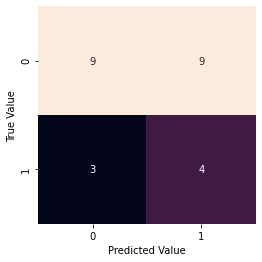

In [723]:
anova = SelectKBest(f_regression, k = 10)
anova.fit(X_res, y_res)
X_train_anova = anova.transform(X_res)
print(X_train_anova.shape)
X_test_anova = anova.transform(X_test)
model = LogisticRegression(solver='liblinear', multi_class="ovr", penalty='l1', C = 10)
model.fit(X_train_anova, y_res)
y_hat = model.predict(X_test_anova)
sns.heatmap(confusion_matrix(y_test, y_hat),square= True, annot=True, cbar= False)
print(f"fbeta_score: {round(fbeta_score(y_test, y_hat, beta = 0), 3)}")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.show()

accuracy：0.635, f_beta-scores：0.308


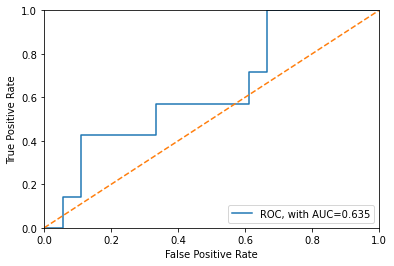

In [686]:
y_hat_prob = model.predict_proba(X_test_anova)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_hat_prob)
auc = roc_auc_score(y_test, y_hat_prob)
print(f"accuracy：{np.around(auc, 3)}, f_beta-scores：{round(fbeta_score(y_test, y_hat, beta = 0), 3)}")
plt.plot(fpr,tpr,label=f"ROC, with AUC={round(auc, 3)}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

### Stacking

In [187]:
GSCV_list = []
for i in range(100):
    print(i)
    lasso = SelectFromModel(Lasso(alpha = 0.1))
    logistic1 = LogisticRegression(solver='liblinear', multi_class="ovr", penalty='l1', C = 0.1)
    anova = SelectKBest(f_regression, k = 10)
    logistic2 = LogisticRegression(solver='liblinear', multi_class="ovr", penalty='l1', C = 1 )
    lasso_pipe = Pipeline(steps=[('lasso', lasso), ('logistic1', logistic1)])
    anova_pipe = Pipeline(steps=[('anova', anova), ('logistic2', logistic2)])
    level0 = [("lasso_pipe", lasso_pipe),("anova_pipe", anova_pipe)]
    level1 = LogisticRegression()
    model = StackingClassifier(estimators=level0, final_estimator=level1)
    param_grid = [{"final_estimator__C":np.logspace(-1, 2, 40)}]
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
    GSCV = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring=make_scorer(fbeta_score, beta = 0), return_train_score = True, n_jobs=-1, verbose = 1)
    GSCV.fit(X_res, y_res)
    GSCV_list.append(GSCV)

0
Fitting 5 folds for each of 40 candidates, totalling 200 fits
1
Fitting 5 folds for each of 40 candidates, totalling 200 fits
2
Fitting 5 folds for each of 40 candidates, totalling 200 fits
3
Fitting 5 folds for each of 40 candidates, totalling 200 fits
4
Fitting 5 folds for each of 40 candidates, totalling 200 fits
5
Fitting 5 folds for each of 40 candidates, totalling 200 fits
6
Fitting 5 folds for each of 40 candidates, totalling 200 fits
7
Fitting 5 folds for each of 40 candidates, totalling 200 fits
8
Fitting 5 folds for each of 40 candidates, totalling 200 fits
9
Fitting 5 folds for each of 40 candidates, totalling 200 fits
10
Fitting 5 folds for each of 40 candidates, totalling 200 fits
11
Fitting 5 folds for each of 40 candidates, totalling 200 fits
12
Fitting 5 folds for each of 40 candidates, totalling 200 fits
13
Fitting 5 folds for each of 40 candidates, totalling 200 fits
14
Fitting 5 folds for each of 40 candidates, totalling 200 fits
15
Fitting 5 folds for each of 40 c

In [205]:
lasso = SelectFromModel(Lasso(alpha = 0.1))
logistic1 = LogisticRegression(solver='liblinear', multi_class="ovr", penalty='l1', C = 0.1)
anova = SelectKBest(f_regression, k = 10)
logistic2 = LogisticRegression(solver='liblinear', multi_class="ovr", penalty='l1', C = 1 )
lasso_pipe = Pipeline(steps=[('lasso', lasso), ('logistic1', logistic1)])
anova_pipe = Pipeline(steps=[('anova', anova), ('logistic2', logistic2)])
level0 = [("lasso_pipe", lasso_pipe),("anova_pipe", anova_pipe)]
level1 = LogisticRegression()
model = StackingClassifier(estimators=level0, final_estimator=level1)
param_grid = [{"final_estimator__C":np.logspace(-1, 2, 40)}]
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
GSCV = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring=make_scorer(fbeta_score, beta = 0), return_train_score = True, n_jobs=-1, verbose = 1)
GSCV.fit(X_res, y_res)
GSCV_list.append(GSCV)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [226]:
GSCV_1 = pd.DataFrame(np.array(GSCV_list[0].cv_results_['mean_test_score']))
for i in range(1, len(GSCV_list)):
    GSCV_1 += pd.DataFrame(np.array(GSCV_list[i].cv_results_['mean_test_score']))
GSCV_1.index = [f"C = {i}"for i in np.logspace(-1, 2, 40)]
round(GSCV_1/1.03, 3)

,0
C = 0.1,63.863
C = 0.11937766417144363,63.863
C = 0.14251026703029981,63.863
C = 0.17012542798525893,63.651
C = 0.20309176209047358,63.651
C = 0.24244620170823283,63.360
C = 0.2894266124716751,62.974
C = 0.345510729459222,62.697
C = 0.41246263829013524,62.363
C = 0.4923882631706739,63.050


fbeta_score: 0.417


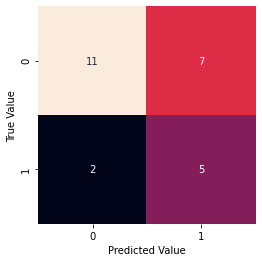

In [227]:
lasso = SelectFromModel(Lasso(alpha = 0.1))
logistic1 = LogisticRegression(solver='liblinear', multi_class="ovr", penalty='l1', C = 0.1)
anova = SelectKBest(f_regression, k = 10)
logistic2 = LogisticRegression(solver='liblinear', multi_class="ovr", penalty='l1', C = 1 )
lasso_pipe = Pipeline(steps=[('lasso', lasso), ('logistic1', logistic1)])
anova_pipe = Pipeline(steps=[('anova', anova), ('logistic2', logistic2)])
level0 = [("lasso_pipe", lasso_pipe),("anova_pipe", anova_pipe)]
level1 = LogisticRegression(C = 10)
model = StackingClassifier(estimators=level0, final_estimator=level1)
model.fit(X_res, y_res)
y_hat = model.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_hat),square= True, annot=True, cbar= False)
print(f"fbeta_score: {round(fbeta_score(y_test, y_hat, beta = 0), 3)}")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.show()

accuracy：0.706, f_beta-scores：0.417


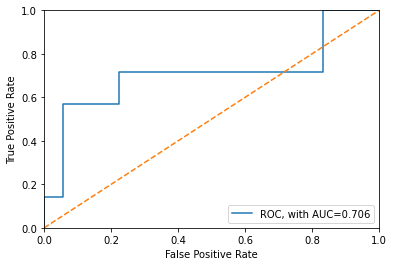

In [228]:
y_hat_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_hat_prob)
auc = roc_auc_score(y_test, y_hat_prob)
print(f"accuracy：{np.around(auc, 3)}, f_beta-scores：{round(fbeta_score(y_test, y_hat, beta = 0), 3)}")
plt.plot(fpr,tpr,label=f"ROC, with AUC={round(auc, 3)}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()